In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import matplotlib
%matplotlib inline

## See a few samples of data

In [2]:
!head ../data/vgsales.csv

#!more ../data/vgsales.csv

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62,


## Load data

In [3]:
# read data from csv file
data = pd.read_csv("../data/vgsales.csv", 
                   warn_bad_lines = True, 
                   error_bad_lines = False, 
                   verbose = True)
print data.info()
print "\n\n data shape: ", data.shape

Tokenization took: 201.46 ms
Type conversion took: 11.39 ms
Parser memory cleanup took: 0.01 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16328 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
Unnamed: 11     0 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None


 data shape:  (16598, 12)


In [4]:
# drop first & last coloumn
data.drop(data.columns[[0, 11]], axis = 1, inplace = True)
data["Year"] = data["Year"].astype('category')
print data.info()
print data.shape
# print data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16328 non-null category
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: category(1), float64(5), object(4)
memory usage: 1.2+ MB
None
(16598, 10)


## missing value statistics

In [5]:
def count_missing(x):
  return sum(x.isnull()) / float(len(x))

# missing value info
print "Missing Value Statistics"
print data.apply(count_missing, axis = 0)

Missing Value Statistics
Name            0.000000
Platform        0.000000
Year            0.016267
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


# Coherence Validation

In [6]:
data[(data['Global_Sales'] < (data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']) - 0.02)]

Name Platform    Year     Genre                    Publisher  \
105  Tekken 3       PS  1998.0  Fighting  Sony Computer Entertainment   

     NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
105      3.27      2.22       1.4         0.29          7.16

## Central Tendency

In [7]:
# basic descriptive statistics, here 50% quartile is just the median
data.describe(percentiles = [0.25,0.5,0.75,0.997], 
              include = 'all')

Name Platform     Year   Genre  \
count                         16598    16598  16328.0   16598   
unique                        11494       31     39.0      12   
top     Need for Speed: Most Wanted       DS   2009.0  Action   
freq                             12     2163   1431.0    3316   
mean                            NaN      NaN      NaN     NaN   
std                             NaN      NaN      NaN     NaN   
min                             NaN      NaN      NaN     NaN   
25%                             NaN      NaN      NaN     NaN   
50%                             NaN      NaN      NaN     NaN   
75%                             NaN      NaN      NaN     NaN   
99.7%                           NaN      NaN      NaN     NaN   
max                             NaN      NaN      NaN     NaN   

              Publisher      NA_Sales      EU_Sales      JP_Sales  \
count             16540  16598.000000  16598.000000  16598.000000   
unique              578           NaN           NaN           NaN   
top     Electronic Arts           NaN           NaN           NaN   
freq               1351           NaN           NaN           NaN   
mean                NaN      0.264668      0.146653      0.077780   
std                 NaN      0.816683      0.505351      0.309291   
min                 NaN      0.000000      0.000000      0.000000   
25%                 NaN      0.000000      0.000000      0.000000   
50%                 NaN      0.080000      0.020000      0.000000   
75%                 NaN      0.240000      0.110000      0.040000   
99.7%               NaN      5.619710      3.540450      2.682090   
max                 NaN     41.490000     29.020000     10.220000   

         Other_Sales  Global_Sales  
count   16598.000000  16598.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean        0.048063      0.537441  
std         0.188588      1.555028  
min         0.000000      0.010000  
25%         0.000000      0.060000  
50%         0.010000      0.170000  
75%         0.040000      0.470000  
99.7%       1.230000     11.211350  
max        10.570000     82.740000

## Spread

In [8]:
data.skew(axis = 0)

NA_Sales        18.799639
EU_Sales        18.875551
JP_Sales        11.206441
Other_Sales     24.233923
Global_Sales    17.400645
dtype: float64

In [9]:
data.kurt(axis = 0)

NA_Sales         649.130824
EU_Sales         756.028720
JP_Sales         194.233495
Other_Sales     1025.348144
Global_Sales     603.932346
dtype: float64

## Box Plot

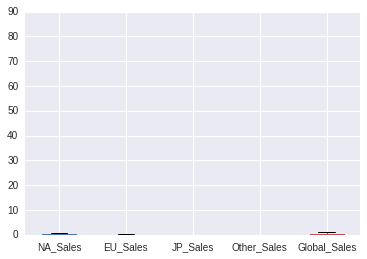

In [10]:
data.plot.box()

In [11]:
data2 = data.loc[(data['NA_Sales'] <= 1) & (data['EU_Sales'] <= 1) &
                 (data['JP_Sales'] <= 1) & (data['Other_Sales'] <= 1) &
                 (data['Global_Sales'] <= 1)]
data2.describe(percentiles = [0.25,0.5,0.75,0.997], include = 'all')

Name Platform     Year   Genre        Publisher  \
count             14544    14544  14296.0   14544            14489   
unique            10485       31     39.0      12              570   
top     LEGO The Hobbit       DS   2009.0  Action  Electronic Arts   
freq                  8     2021   1315.0    2894             1013   
mean                NaN      NaN      NaN     NaN              NaN   
std                 NaN      NaN      NaN     NaN              NaN   
min                 NaN      NaN      NaN     NaN              NaN   
25%                 NaN      NaN      NaN     NaN              NaN   
50%                 NaN      NaN      NaN     NaN              NaN   
75%                 NaN      NaN      NaN     NaN              NaN   
99.7%               NaN      NaN      NaN     NaN              NaN   
max                 NaN      NaN      NaN     NaN              NaN   

            NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales  
count   14544.000000  14544.000000  14544.000000  14544.000000  14544.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean        0.111285      0.053524      0.039102      0.018190      0.222421  
std         0.145362      0.089619      0.098900      0.033426      0.227924  
min         0.000000      0.000000      0.000000      0.000000      0.010000  
25%         0.000000      0.000000      0.000000      0.000000      0.050000  
50%         0.060000      0.020000      0.000000      0.010000      0.140000  
75%         0.160000      0.060000      0.030000      0.020000      0.320000  
99.7%       0.770000      0.530000      0.710000      0.220000      0.990000  
max         0.940000      0.920000      1.000000      0.740000      1.000000

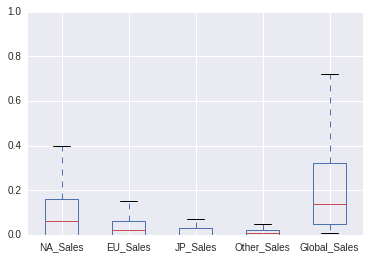

In [12]:
data2.boxplot(figsize = (8,8))

## Histogram

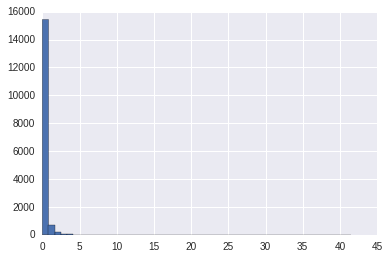

In [13]:
data['NA_Sales'].hist(bins = 50)

## Categorical Analysis

In [14]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
genre_cnt = data['Genre'].value_counts(sort = False)
print genre_cnt
genre_freq = genre_cnt / float(data.shape[0])
print genre_freq

Role-Playing    1488
Simulation       867
Sports          2346
Platform         886
Puzzle           582
Shooter         1309
Fighting         848
Action          3316
Misc            1739
Strategy         682
Adventure       1286
Racing          1249
Name: Genre, dtype: int64
Role-Playing    0.089649
Simulation      0.052235
Sports          0.141342
Platform        0.053380
Puzzle          0.035064
Shooter         0.078865
Fighting        0.051090
Action          0.199783
Misc            0.104772
Strategy        0.041089
Adventure       0.077479
Racing          0.075250
Name: Genre, dtype: float64


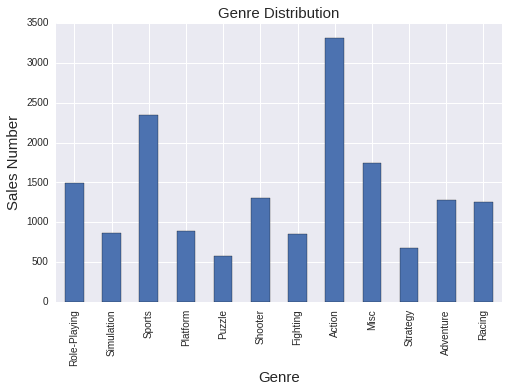

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
genre_cnt.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Genre Distribution', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Sales Number', fontsize = 15)

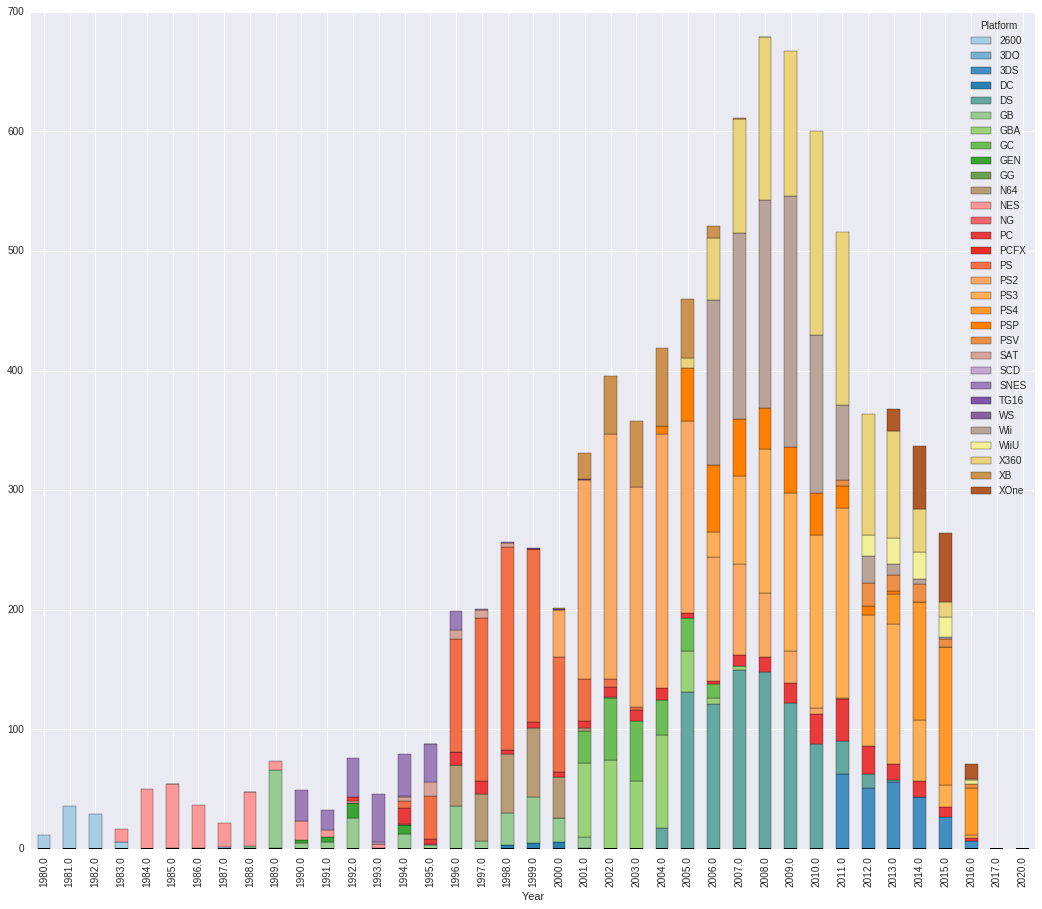

In [17]:
fig, ax = plt.subplots(figsize=(18,15))
data.groupby(['Year', 'Platform']).sum().unstack().plot(y = 'Global_Sales', kind = 'bar', ax = ax, stacked = True, colormap = 'Paired')
plt.show()

## Top-N Count Analysis

12 categories with total 16598 records


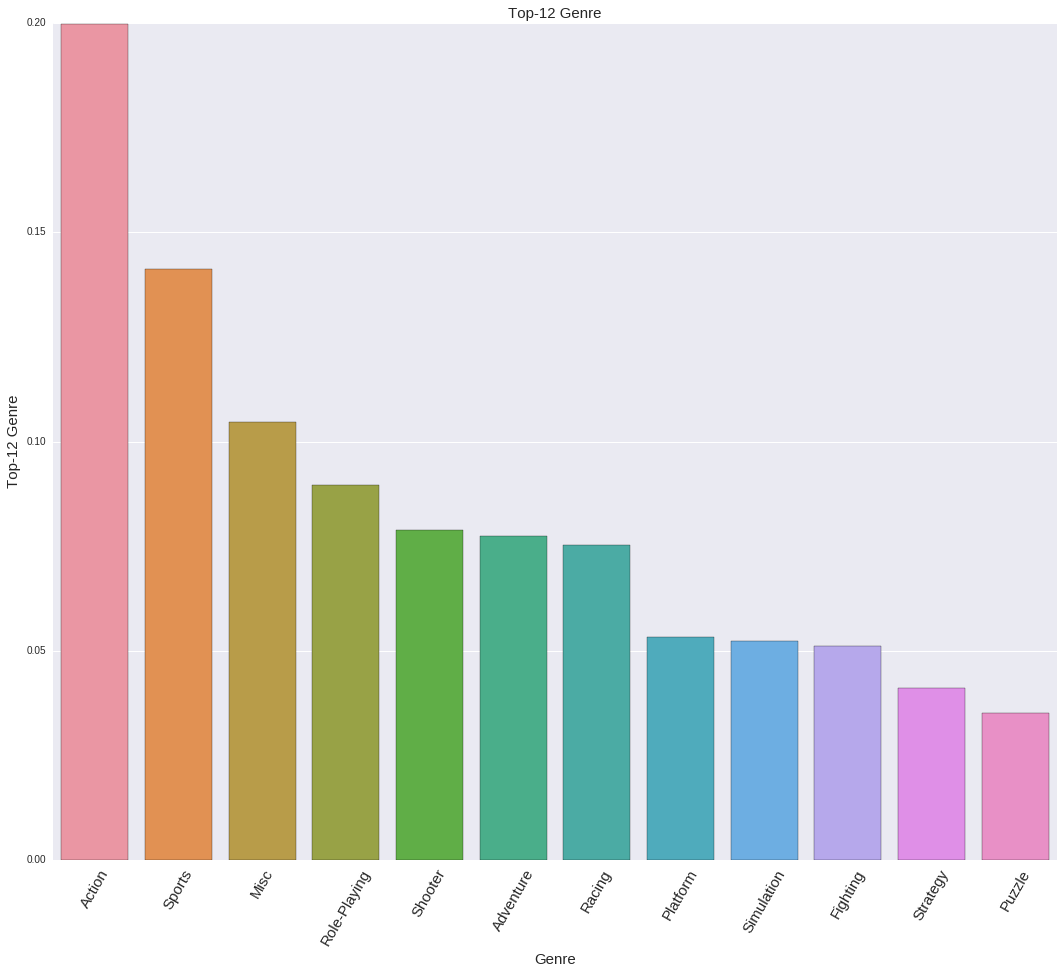

In [18]:
# print data['Genre'].dropna().tolist()
genre = Counter(data['Genre'].dropna().tolist())
total = sum(genre.values())
genre = genre.most_common() # parameter can be the N
N = len(genre)

print "%d categories with total %d records" % (N, total)

genre_name = [item[0] for item in genre]
genre_counts = [item[1] / float(total) for item in genre]
# print genre_counts

fig, ax = plt.subplots(figsize=(18,15))
sns.barplot(x = genre_name, y = genre_counts, ax = ax)
plt.title("Top-%d Genre" % (N), fontsize = 15)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Top-%d Genre" % (N), fontsize = 15)
ticks = plt.setp(ax.get_xticklabels(), fontsize = 15, rotation = 60)

## Top-N Sales

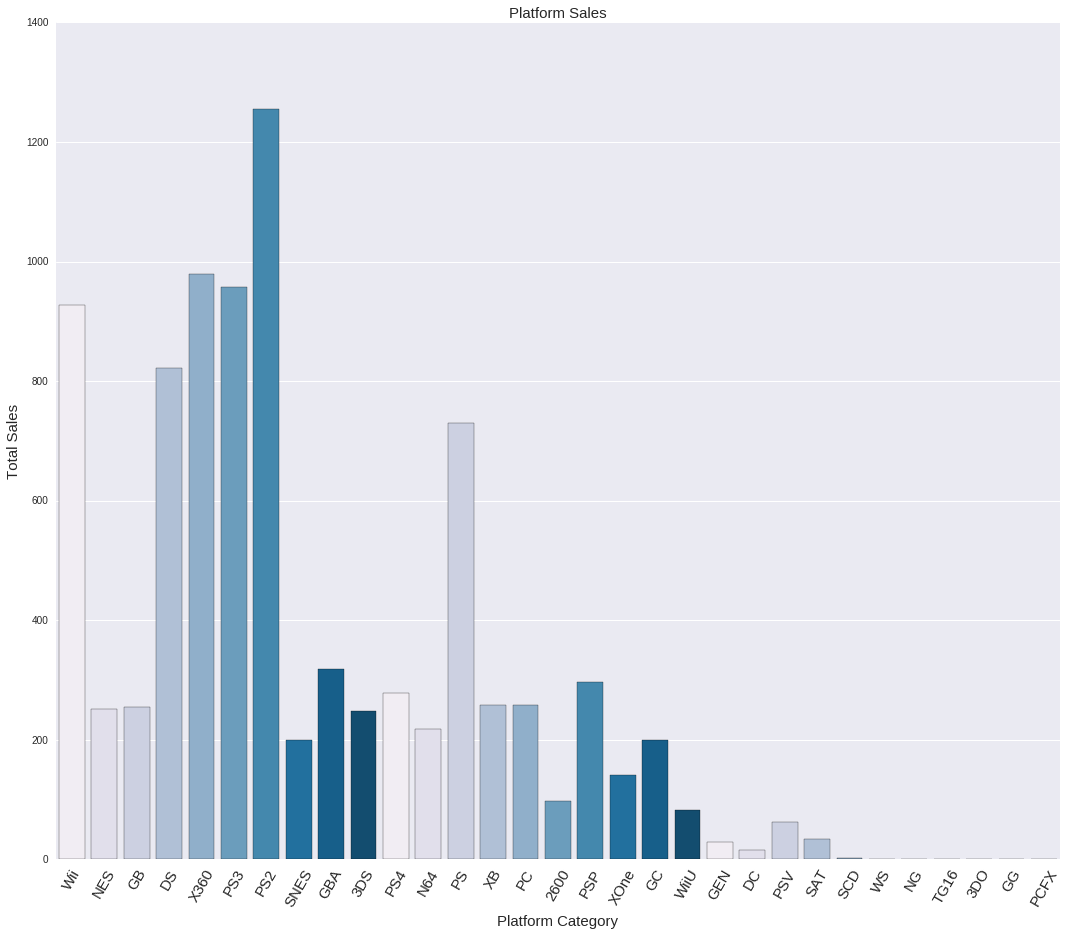

In [19]:
platforms = data['Platform'].unique()
platform_sales = []

for platform in platforms:
  platform_sales.append(data[data['Platform'] == platform]['Global_Sales'].dropna().sum())

fig, ax = plt.subplots(figsize = (18, 15))
sns.barplot(x = platforms, y = platform_sales, ax = ax, palette = sns.color_palette("PuBu", 10))

plt.title("Platform Sales", fontsize = 15)
plt.xlabel("Platform Category", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
ticks = plt.setp(ax.get_xticklabels(), fontsize = 15, rotation = 60)

## Heat Map

<a list of 12 Text xticklabel objects>


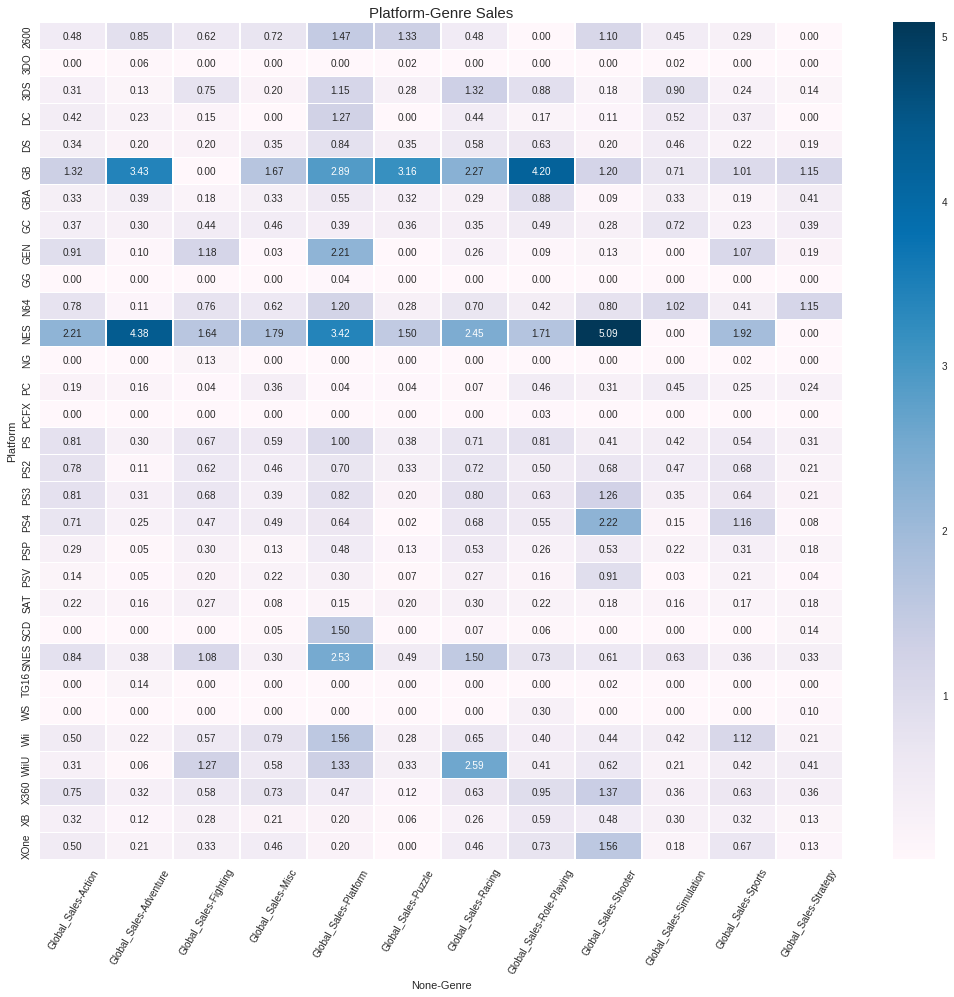

In [20]:
table_sales = pd.pivot_table(data, values = ['Global_Sales'], index = ['Platform'], columns = ['Genre'], aggfunc = np.mean, fill_value = 0, margins = False)

fig, ax = plt.subplots(figsize = (18, 15))
sns.heatmap(table_sales, linewidth = .5, annot = True, vmin = 0.01, fmt = '.2f', cmap = 'PuBu')
plt.title("Platform-Genre Sales", fontsize = 15)
# ticks_y = plt.setp(ax.get_yticklabels(), fontsize = 15)
ticks_x = plt.setp(ax.get_xticklabels(), rotation = 60)
print ax.get_xticklabels()

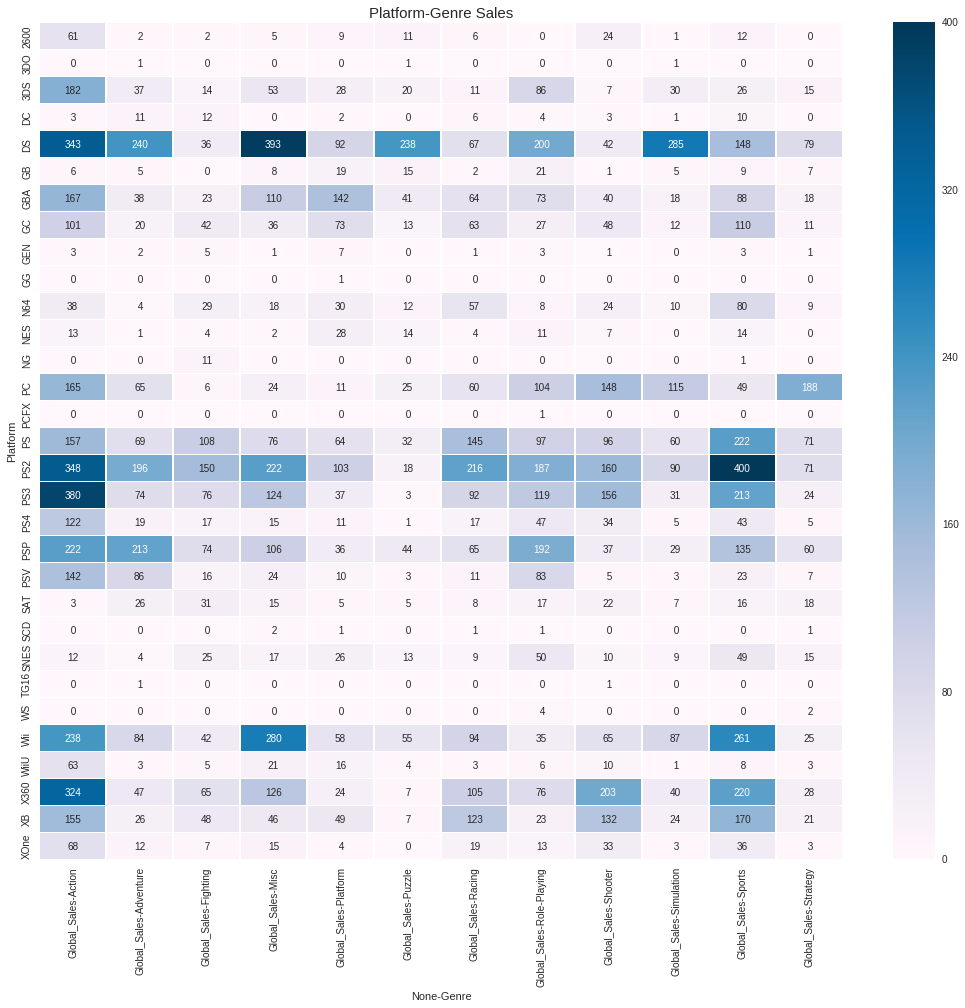

In [21]:
table_sales = pd.pivot_table(data, values = ['Global_Sales'], index = ['Platform'], columns = ['Genre'], aggfunc = 'count', fill_value = 0, margins = False)
# print table_sales

fig, ax = plt.subplots(figsize = (18, 15))
sns.heatmap(table_sales, linewidth = .5, annot = True, vmin = 0, fmt = '2.0f', cmap = 'PuBu')
plt.title("Platform-Genre Sales", fontsize = 15)
# ticks_y = plt.setp(ax.get_yticklabels(), fontsize = 15)
# ticks = plt.setp(ax.get_xticklabels(), fontsize = 15, rotation = 60)

## Word Cloud

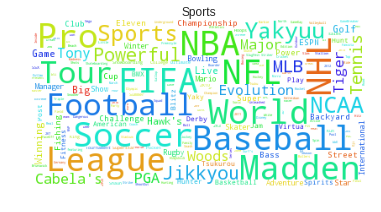

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)

for genre in data.Genre.unique():
    # print data.Name[data.Genre == genre].to_string()
    if genre == "Sports":
      wc = WordCloud(background_color = "white", max_font_size = 40, max_words = 200, stopwords = stopwords, random_state = 42)
      wc.generate(data.Name[data.Genre == genre].to_string())
      plt.imshow(wc)
      plt.title(genre)
      plt.axis("off")
      plt.show()

## Pie Chart

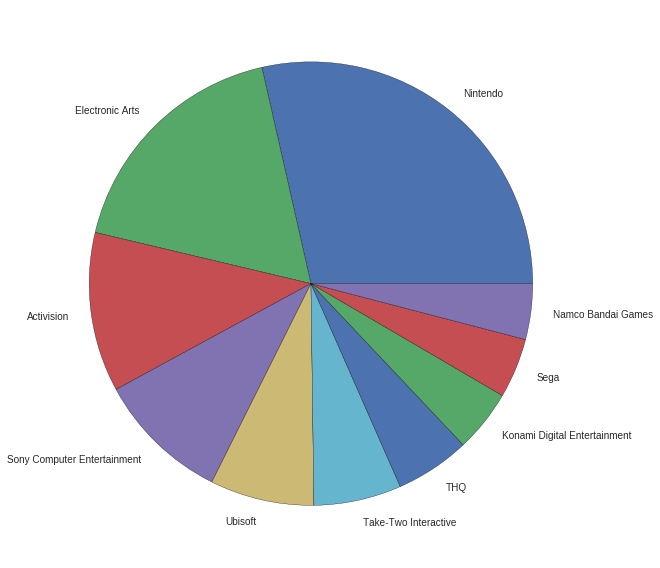

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
publisher = data.groupby('Publisher').sum()['Global_Sales']
publisher.sort_values(ascending = False)[:10].plot.pie()
ax.set_ylabel("")
plt.tight_layout()

# print publisher